In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import DiscreteFourierTransform

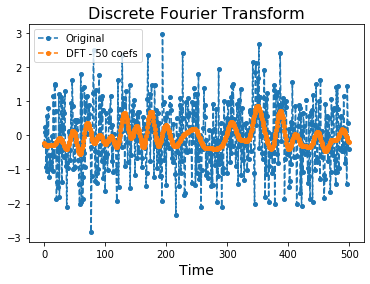

In [32]:
# Parameters
n_samples, n_timestamps = 1, 500

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# DFT transformation
n_coefs = 50
dft = DiscreteFourierTransform(n_coefs=n_coefs, norm_mean=False,
                               norm_std=False)
X_dft = dft.fit_transform(X)

# Compute the inverse transformation
if n_coefs % 2 == 0:
    real_idx = np.arange(1, n_coefs, 2)
    imag_idx = np.arange(2, n_coefs, 2)
    X_dft_new = np.c_[
        X_dft[:, :1],
        X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                        np.zeros((n_samples, ))]
    ]
else:
    real_idx = np.arange(1, n_coefs, 2)
    imag_idx = np.arange(2, n_coefs + 1, 2)
    X_dft_new = np.c_[
        X_dft[:, :1],
        X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
    ]
X_irfft = np.fft.irfft(X_dft_new, n_timestamps)

# Show the results for the first time series
plt.figure(figsize=(6, 4))
plt.plot(X[0], 'o--', ms=4, label='Original')
plt.plot(X_irfft[0], 'o--', ms=4, label='DFT - {0} coefs'.format(n_coefs))
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=14)
plt.title('Discrete Fourier Transform', fontsize=16)
plt.show()